# A practical introduction to machine learning and natural language processing on papyrus data 
## By MSc. André Walsøe and dr. Andrea Gasparini University of Oslo


![alt text](https://www.kdnuggets.com/wp-content/uploads/text-data-task-framework.png "Logo Title Text 1")
source: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html


# Session 1 Preparation and exploration of Dataset

1. Install python libraries and download resources
2. Download dataset from github repository

### 1.1 Download dataset and install libraries
The dataset was created by downloading and filtering data from https://github.com/papyri/idp.data/tree/master/APIS

In [97]:
!curl -L -o data.tsv https://raw.githubusercontent.com/auwalsoe/encode_nlp_workshop_2023/main/data/papyrus_data.tsv
!pip install nltk
!pip install gradio
import nltk
nltk.download('punkt')
nltk.download('stopwords')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8467k  100 8467k    0     0  7112k      0  0:00:01  0:00:01 --:--:-- 7115k


[nltk_data] Downloading package punkt to /home/andrehome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andrehome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Session 2: Data exploration and introduction to NLP techniques

## 2.1 Data exploration and introduction to NLP techniques

1. Basic data exploration with pandas
2. Application of filtering techniques based on data exploration findings
3. Hands-on task: Data exploration and filtering 

### 2.1.2 Basic Data exploration and filtering with pandas
To load the dataset into our google colab we use a library called pandas (https://pandas.pydata.org) which is a open source data analysis and data manipulation tool that is widely used for every tasks involving data.

In [98]:
#Importing the pandas Library
import pandas as pd

# Loading the downloaded data into a pandas dataframe
data = pd.read_csv('/content/data.tsv', delimiter = '\t')
#data = pd.read_csv('data.tsv', delimiter = '\t')
data.head()

,Unnamed: 0,translation,category,author,summary,keywords,originDate,provenance,num_words_in_translation
0,0,"kollesis obscures much of the text. 6 lines, o...",documentary text,unknown,unknown,papyri,Between 300 and 130 B.C.,unknown,24
1,3,"21 lines, on recto along the fibers; 2 lines (...",letter : conclusion : to maron,unknown,conclusion of a letter to maron about various ...,papyri,Late 2nd or 3rd century A.D.,unknown,24
2,1,3+ cols. (54+ lines) on recto along the fibers...,account : fragment,unknown,unknown,papyri,Late 2nd century B.C.,unknown,12
3,3,"10 lines, on verso across the fibers. on recto...",tax receipt,diodoros,"diodoros and partners, farmers of the crown ta...",papyri,181/182 or 213/214 A.D.,unknown,67
4,3,"49 lines, on verso across the fibers. recto em...",petition from harmiysis and the crown tenants ...,harmiysis,harmiysis and the crown tenants complain to kr...,papyri,Between 105 and 90 B.C.,unknown,240


In [99]:
## Printing column names
for col in data.columns:
    print(col)

Unnamed: 0
translation
category
author
summary
keywords
originDate
provenance
num_words_in_translation


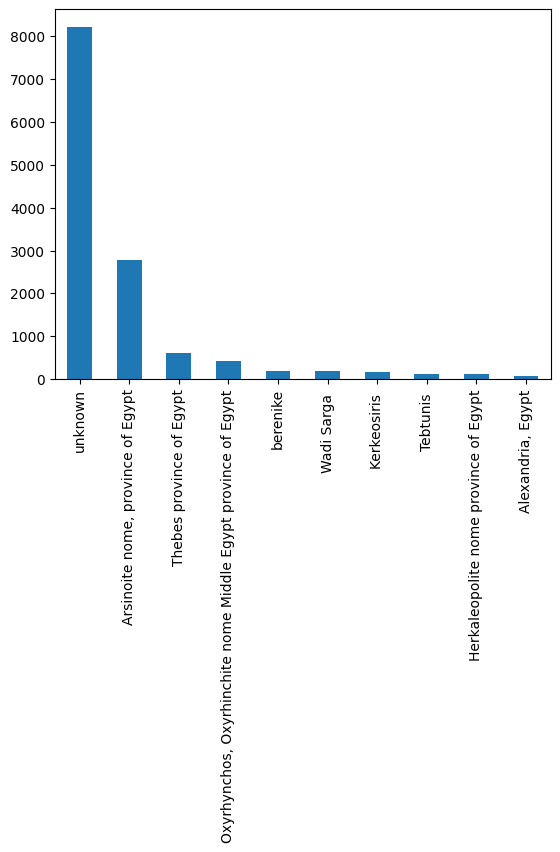

In [100]:
## Get frequencies of columns
def plot_column_distribution(dataset, column_name, top_n):
    """Creates a bar plot of the frequency of different columns in the dataset.
    Input variables:
    dataset: Pandas dataframe
    Column name: string
    top_n: int"""
    
    dataset[column_name].value_counts()[:top_n].plot(kind="bar")
#data.category.value_counts()[:10].plot(kind='bar')

plot_column_distribution(data, "provenance", 10)

### 2.2.2 Application of filtering techniques based on data exploration findings

In [101]:
# Removing data entries with unknown provenance from the dataset
data = data[data.provenance != 'unknown']

In [102]:
# Assigning all provenances with frequency less than 100 to "other"
threshold = 100
freq = data['provenance'].value_counts()
mappings = freq.index.to_series().mask(freq < threshold, 'Other').to_dict()

data['provenance'] = data['provenance'].map(mappings)


translations = data['translation'].values
provenance = data['provenance'].values


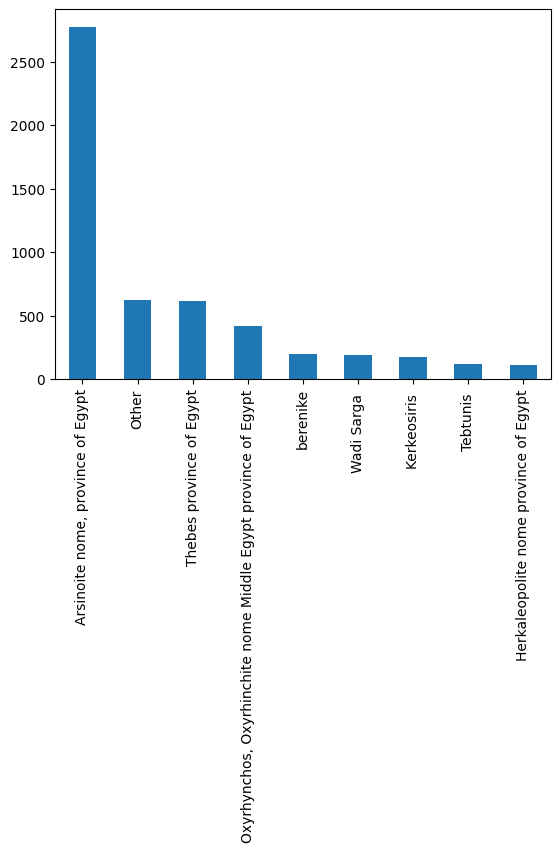

In [103]:
plot_column_distribution(data, "provenance", 10)


### 2.1.3 Hands-on excercise: Data exploration and filtering
Explore the different columns of the dataset, for example with the plot_column_distribution function and propose other filters that should be applied to improve the dataset. 


In [104]:
### Write your solution or ideas below this line:


# Session 2.2: Introduction to nlp techniques
1. Lower text 
2. Tokenization
3. Stopword removal
4. Vectorization
6. Show how these techniques can be applied on papyrus data using NLTK
7. Hands-on exercise: Apply NLP techniques to papyrus dataset

### Example corpus
A corpus is a structured set of texts which can be used for statistical analysis or similar. In this exercise we will use a small example corpus consisting of parts of 3 papyri translations that were chosen randomly. In this section I will show how we can apply the pre-processing methods shown above on a corpus. We will re-use the functions written above. 

In [105]:
example_corpus = ["Agathon to Patron, greeting. Apollonios has applied to me about the village of Takona, that you should appoint him as guard. you would therefore do well to hand (the post?) over to him. good-bye", 
                  "Address Asklepiades to Marres, greeting. Menches having been appointed village scribe of Kerkeosiris on the understanding that he shall cultivate at his own expense ten arouras of the land in the neighborhood of the village which has been reported as unproductive at a rent of fifty artabas", 
                  "I therefore present to you this complaint in order that the accused may be summoned and compelled to refund me the damage; and if he refuses i beg you to forward a copy of the petition to the proper officials, so that I may have it placed on record and the king may incur no loss. Farewell."]
example_corpus

['Agathon to Patron, greeting. Apollonios has applied to me about the village of Takona, that you should appoint him as guard. you would therefore do well to hand (the post?) over to him. good-bye',
 'Address Asklepiades to Marres, greeting. Menches having been appointed village scribe of Kerkeosiris on the understanding that he shall cultivate at his own expense ten arouras of the land in the neighborhood of the village which has been reported as unproductive at a rent of fifty artabas',
 'I therefore present to you this complaint in order that the accused may be summoned and compelled to refund me the damage; and if he refuses i beg you to forward a copy of the petition to the proper officials, so that I may have it placed on record and the king may incur no loss. Farewell.']

### 2.2.1 Lower text
Here it is shown how to lower the text. In a small dataset it is an important step, as the word will be interpreted as 2 different words by the algorithm if the word is written with capital letter or not.

In [106]:
example_corpus = [x.lower() for x in example_corpus]
example_corpus

['agathon to patron, greeting. apollonios has applied to me about the village of takona, that you should appoint him as guard. you would therefore do well to hand (the post?) over to him. good-bye',
 'address asklepiades to marres, greeting. menches having been appointed village scribe of kerkeosiris on the understanding that he shall cultivate at his own expense ten arouras of the land in the neighborhood of the village which has been reported as unproductive at a rent of fifty artabas',
 'i therefore present to you this complaint in order that the accused may be summoned and compelled to refund me the damage; and if he refuses i beg you to forward a copy of the petition to the proper officials, so that i may have it placed on record and the king may incur no loss. farewell.']

### 2.2.2 Tokenization
Tokenization is a way of splitting a text into smaller units, called tokens, in this example we will split it into words, but one can also split into sentences, letters or other types of units. The reason for doing this is that most NLP models and algorithms work on a token level. The tokens are also used to create the vocabulary, the set of unique tokens in the corpus.

In our example we use the word_tokenize method from the Natural language toolkit library (NLTK): https://www.nltk.org/api/nltk.tokenize.html

In [107]:
from nltk.tokenize import word_tokenize
tokenized_example_corpus = [word_tokenize(x) for x in example_corpus]
tokenized_example_corpus

[['agathon',
  'to',
  'patron',
  ',',
  'greeting',
  '.',
  'apollonios',
  'has',
  'applied',
  'to',
  'me',
  'about',
  'the',
  'village',
  'of',
  'takona',
  ',',
  'that',
  'you',
  'should',
  'appoint',
  'him',
  'as',
  'guard',
  '.',
  'you',
  'would',
  'therefore',
  'do',
  'well',
  'to',
  'hand',
  '(',
  'the',
  'post',
  '?',
  ')',
  'over',
  'to',
  'him',
  '.',
  'good-bye'],
 ['address',
  'asklepiades',
  'to',
  'marres',
  ',',
  'greeting',
  '.',
  'menches',
  'having',
  'been',
  'appointed',
  'village',
  'scribe',
  'of',
  'kerkeosiris',
  'on',
  'the',
  'understanding',
  'that',
  'he',
  'shall',
  'cultivate',
  'at',
  'his',
  'own',
  'expense',
  'ten',
  'arouras',
  'of',
  'the',
  'land',
  'in',
  'the',
  'neighborhood',
  'of',
  'the',
  'village',
  'which',
  'has',
  'been',
  'reported',
  'as',
  'unproductive',
  'at',
  'a',
  'rent',
  'of',
  'fifty',
  'artabas'],
 ['i',
  'therefore',
  'present',
  'to',
  'y

### 2.2.3 Stopword removal
After tokenizing the corpus the next step is to remove the stopwords. Stopwords are words that are words that are frequently used in a language. In english it can be words like:
- i
- me
- my
- myself
- we
- our
- ours
- ourselves
- you
- your
- yours
- yourself
- yourselves
- he


Full list can be seen here: https://gist.github.com/sebleier/554280

The reason why we remove the stopwords is that we assume that these words are not as important as less frequently used words when trying to separate one text from another. This assumption is not true for all applications, and will need to be tested. In applications like sentiment analysis, stopword removal might be a bad idea.
Another advantage of removing stopwords is that it reduces the vocabulary, which results in a data representation with fewer dimension, which will be less computationally expensive.

In [108]:
from nltk.corpus import stopwords
def remove_stopwords(tokenized_text, stopwords):
    clean_tokenized_text = [x for x in tokenized_text if x not in stopwords.words('english')]
    return clean_tokenized_text

tokenized_example_corpus_without_stopwords = [remove_stopwords(x, stopwords) for x in tokenized_example_corpus]
tokenized_example_corpus_without_stopwords

[['agathon',
  'patron',
  ',',
  'greeting',
  '.',
  'apollonios',
  'applied',
  'village',
  'takona',
  ',',
  'appoint',
  'guard',
  '.',
  'would',
  'therefore',
  'well',
  'hand',
  '(',
  'post',
  '?',
  ')',
  '.',
  'good-bye'],
 ['address',
  'asklepiades',
  'marres',
  ',',
  'greeting',
  '.',
  'menches',
  'appointed',
  'village',
  'scribe',
  'kerkeosiris',
  'understanding',
  'shall',
  'cultivate',
  'expense',
  'ten',
  'arouras',
  'land',
  'neighborhood',
  'village',
  'reported',
  'unproductive',
  'rent',
  'fifty',
  'artabas'],
 ['therefore',
  'present',
  'complaint',
  'order',
  'accused',
  'may',
  'summoned',
  'compelled',
  'refund',
  'damage',
  ';',
  'refuses',
  'beg',
  'forward',
  'copy',
  'petition',
  'proper',
  'officials',
  ',',
  'may',
  'placed',
  'record',
  'king',
  'may',
  'incur',
  'loss',
  '.',
  'farewell',
  '.']]

### 2.2.4 Vectorization
Vectorization describes the way to convert data from raw text into vectors of numbers that can be input to machine learning models. This is a key part of feature extraction. There are several ways of converting the data, but in this workshop we will cover only 2:
- Count
- Tfidf

#### Count Vectorization

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

CountVect = CountVectorizer(stop_words='english').fit(example_corpus)

example_corpus_count_vectorized = CountVect.transform(example_corpus)
print(CountVect.get_feature_names_out())
print(example_corpus_count_vectorized.toarray())


['accused' 'address' 'agathon' 'apollonios' 'applied' 'appoint'
 'appointed' 'arouras' 'artabas' 'asklepiades' 'beg' 'bye' 'compelled'
 'complaint' 'copy' 'cultivate' 'damage' 'expense' 'farewell' 'forward'
 'good' 'greeting' 'guard' 'hand' 'having' 'incur' 'kerkeosiris' 'king'
 'land' 'loss' 'marres' 'menches' 'neighborhood' 'officials' 'order'
 'patron' 'petition' 'placed' 'post' 'present' 'proper' 'record' 'refund'
 'refuses' 'rent' 'reported' 'scribe' 'shall' 'summoned' 'takona'
 'understanding' 'unproductive' 'village']
[[0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0
  1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]]


#### Tf-idf vectorization
Tf-idf stands for term frequency-inverse document frequency. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

How it is calculated:

![alt text](https://mungingdata.files.wordpress.com/2017/11/equation.png "Logo Title Text 1")

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVect = TfidfVectorizer(stop_words='english').fit(example_corpus)

example_corpus_tfidf_vectorized = TfidfVect.transform(example_corpus)
print(TfidfVect.get_feature_names_out())
print(example_corpus_tfidf_vectorized.toarray())

['accused' 'address' 'agathon' 'apollonios' 'applied' 'appoint'
 'appointed' 'arouras' 'artabas' 'asklepiades' 'beg' 'bye' 'compelled'
 'complaint' 'copy' 'cultivate' 'damage' 'expense' 'farewell' 'forward'
 'good' 'greeting' 'guard' 'hand' 'having' 'incur' 'kerkeosiris' 'king'
 'land' 'loss' 'marres' 'menches' 'neighborhood' 'officials' 'order'
 'patron' 'petition' 'placed' 'post' 'present' 'proper' 'record' 'refund'
 'refuses' 'rent' 'reported' 'scribe' 'shall' 'summoned' 'takona'
 'understanding' 'unproductive' 'village']
[[0.         0.         0.28680742 0.28680742 0.28680742 0.28680742
  0.         0.         0.         0.         0.         0.28680742
  0.         0.         0.         0.         0.         0.
  0.         0.         0.28680742 0.21812444 0.28680742 0.28680742
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.28680742
  0.         0.         0.28680742 0.         0.         0.
  0.         0.  

### 2.2.5 Hands-on exercise: Apply NLP techniques to papyrus dataset

## Session 3: Building a text classification model
1. Building a text classification model
    1. Choose what to predict and which variables to use
    2. Split data into training and test
    3. Transform/vectorize data
    4. Train a logistic regression model
    5. Test and evaluate metrics
    6. Deploy model with Gradio
4. Hands-on exercise: Build and train your own classification model (deploy it with Gradio if time allows)
5. Wrap-up

### 3.1 Building a text classification model


#### 3.1.1 Choose what to classify and data to train the model with
As we saw in 2.1.2 we have several different types of data columns:
- translation
- category
- author
- summary
- keywords
- originDate
- provenance

Which means that there are many possible data inputs we can use in order to build a model.
In a classification model we need input variables x and a label y that we want to predict.

In this example (since we are doing NLP), I will use translations as the input data. With the translations we could classify author, category, provenance or originData. Here I will show how to build a model that tries to classify a papyrus provenance based on it's translation. 

In the hands-on session you can try to change what to classify and see how it works :)

#### 3.1.2 Split data into training and test

In [111]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(translations, provenance, test_size=0.2, random_state=42)

#### 3.1.3 Transform/vectorize data

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(lowercase= True, analyzer = "word", stop_words="english")

X_train= tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

#### 3.1.4 Train a logistic regression model

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#### 3.1.5 Test and evaluate metrics

In [114]:
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                                               precision    recall  f1-score   support

                            Arsinoite nome, province of Egypt       0.84      0.98      0.90       555
                        Herkaleopolite nome province of Egypt       0.91      0.53      0.67        19
                                                 Kerkeosiris        0.82      0.66      0.73        47
                                                        Other       0.57      0.58      0.58       105
Oxyrhynchos, Oxyrhinchite nome Middle Egypt province of Egypt       0.93      0.34      0.50        79
                                                    Tebtunis        1.00      0.58      0.73        19
                                     Thebes province of Egypt       0.99      0.94      0.96       126
                                                  Wadi Sarga        1.00      1.00      1.00        47
                                                     berenike       0.97

ADD EXPLANATION OF OUTPUT METRICS HERE

#### 3.3.6 Deploy model with Gradio                                  

In [1]:
import gradio as gr

def find_my_provenance(text):
    text_tfidf = tfidf_vect.transform([text])
    return str(model.predict(text_tfidf)[0])
demo = gr.Interface(fn = find_my_provenance, inputs=gr.Textbox(lines=3,placeholder="Papyrus translation here"), outputs="text")
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://4a2f121e-73c4-461d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/home/andrehome/projects/encode_nlp_workshop_2023/venv/lib/python3.10/site-packages/gradio/routes.py", line 321, in run_predict
    output = await app.blocks.process_api(
  File "/home/andrehome/projects/encode_nlp_workshop_2023/venv/lib/python3.10/site-packages/gradio/blocks.py", line 1015, in process_api
    result = await self.call_function(fn_index, inputs, iterator, request)
  File "/home/andrehome/projects/encode_nlp_workshop_2023/venv/lib/python3.10/site-packages/gradio/blocks.py", line 856, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/andrehome/projects/encode_nlp_workshop_2023/venv/lib/python3.10/site-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/home/andrehome/projects/encode_nlp_workshop_2023/venv/lib/python3.10/site-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/

### 3.4 Hands-on exercise: Build and train your own classification model
Here in this task you can train your own machine learning model and interpret the output results. 
Using function X you can deploy this machine learning (temporarily with Gradio)

Here are some example columns to use.


### 3.5 Wrap-up

Thanks for joining me for this workshop!

Here are some resources for learning more about machine learning and NLP:
- 
- 
